In [20]:
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv("../data/real_final_train.csv")
test = pd.read_csv("../data/real_final_test.csv")

In [3]:
print(train.shape)
print(test.shape)

(15000, 20)
(35452, 19)


In [4]:
train.head()

,VCL_0,VCL_38,education,urban,gender,engnat,hand,religion,hand.1,religion.1,age_cat,married,orientation,familysize,ASD,nerdiness,Qs,TIPI_left,TIPI_right,VCL_1
0,2,0,2,1,3,1,2,12,2,12,2,1,4,4,2,1,2.346154,2.75,2.333333,1.0
1,1,1,4,2,2,1,1,2,1,2,4,2,1,4,2,1,2.269231,3.50,2.000000,1.0
2,1,1,2,1,1,2,1,2,1,2,4,3,2,4,2,1,2.346154,5.00,2.000000,1.0
3,2,0,1,3,1,1,2,1,2,1,1,1,1,2,2,1,2.384615,3.50,2.500000,1.0
4,2,1,1,2,2,2,2,12,2,12,1,1,1,1,2,0,2.423077,3.75,2.666667,1.0


In [5]:
from pycaret.classification import *

In [6]:
clf = setup(data = train, target = 'nerdiness')

,Description,Value
0,session_id,1564
1,Target,nerdiness
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15000, 20)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,15
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
best_3 = compare_models(sort = 'AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9997,1.0000,0.9995,1.0000,0.9997,0.9994,0.9994,0.0650
gbc,Gradient Boosting Classifier,0.9998,1.0000,0.9997,1.0000,0.9998,0.9996,0.9996,0.1870
xgboost,Extreme Gradient Boosting,0.9998,1.0000,0.9997,1.0000,0.9998,0.9996,0.9996,0.2520
lightgbm,Light Gradient Boosting Machine,0.9996,1.0000,0.9997,0.9997,0.9997,0.9992,0.9992,0.1370
dt,Decision Tree Classifier,0.9995,0.9995,0.9997,0.9995,0.9996,0.9990,0.9990,0.0160
rf,Random Forest Classifier,0.9304,0.9823,0.9382,0.9355,0.9368,0.8593,0.8594,0.1110
et,Extra Trees Classifier,0.8623,0.9445,0.8891,0.8646,0.8766,0.7208,0.7213,0.1540
lr,Logistic Regression,0.7305,0.8077,0.7975,0.7353,0.7650,0.4501,0.4524,0.5420
lda,Linear Discriminant Analysis,0.7309,0.8066,0.8117,0.7299,0.7685,0.4494,0.4533,0.0360
knn,K Neighbors Classifier,0.6680,0.7170,0.7330,0.6856,0.7084,0.3239,0.3249,0.4520


In [8]:
blended = blend_models(estimator_list = best_3, fold = 5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9995,1.0000,0.9991,1.0000,0.9996,0.9990,0.9990
2,0.9995,0.9991,0.9991,1.0000,0.9996,0.9990,0.9990
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Mean,0.9998,0.9998,0.9997,1.0000,0.9998,0.9996,0.9996
SD,0.0002,0.0003,0.0004,0.0000,0.0002,0.0005,0.0005


In [9]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [10]:
final_model = finalize_model(blended)

In [12]:
predictions = predict_model(final_model, data = test)

In [13]:
predictions

,VCL_0,VCL_38,education,urban,gender,engnat,hand,religion,hand.1,religion.1,...,married,orientation,familysize,ASD,Qs,TIPI_left,TIPI_right,VCL_1,Label,Score
0,0,2,2,3,2,2,1,4,1,4,...,1,4,3,2,2.769231,3.0,2.500000,1.00,0,0.8447
1,2,2,2,2,1,1,1,1,1,1,...,1,5,5,2,2.884615,3.0,2.666667,1.00,0,0.8447
2,2,1,1,3,2,2,1,4,1,4,...,1,5,3,2,2.692308,2.5,2.666667,1.00,0,0.5070
3,0,1,2,2,1,1,1,2,1,2,...,1,2,3,2,2.576923,3.0,2.666667,1.00,0,0.8447
4,2,0,2,3,2,2,1,4,1,4,...,1,5,2,2,2.538462,1.5,2.500000,0.25,0,0.8219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,2,0,2,3,2,2,3,10,3,10,...,1,4,3,2,2.769231,2.5,2.833333,0.00,0,0.5070
35448,2,1,2,2,3,1,3,2,3,2,...,1,5,2,2,2.730769,2.5,2.666667,0.75,0,0.5071
35449,2,1,3,3,1,1,1,1,1,1,...,1,5,2,2,2.807692,3.0,2.500000,1.00,0,0.8447
35450,1,1,2,3,1,1,1,12,1,12,...,1,1,2,2,2.538462,2.5,2.666667,1.00,0,0.5070


In [11]:
submission = pd.read_csv("../data/sample_submission.csv")

In [14]:
submission['nerdiness'] = predictions['Label']

In [19]:
submission['nerdiness'].nunique()

2

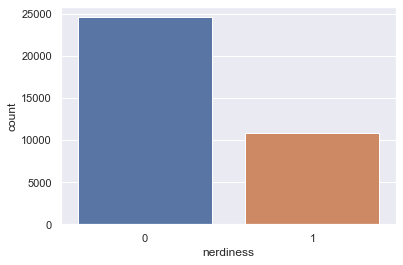

In [21]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="nerdiness", data=submission)

In [22]:
submission.to_csv('automl_with_realfinal.csv', index = False)